In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# lets have the seaborn style
sns.set(style="whitegrid")

# Task 1: Load and Explore the dataset
try:
    #  loading the file
    dataf = pd.read_csv("bank-full.csv", sep=';')
    print("Dataset Loaded Successfully.\n")
    
    # Displaying the first few rows
    print(dataf.head())

    # Data types and missing values
    print("\nData Types:\n", dataf.dtypes)
    print("\n These Are The Missing Values:\n", dataf.isnull().sum())

    # Cleaning the missing values using (dropna)
    dataf_cleaned = dataf.dropna()
    print("\nMy Cleaned DataFrame Shape Is:", dataf_cleaned.shape)

except FileNotFoundError:
    print("Error: The file 'bank-full.csv' was not found. Please check the path.")
    exit()
except pd.errors.ParserError:
    print("Error: Could Not arse the file. Check if it's a valid CSV with correct delimiter.")
    exit()
except Exception as e:
    print("An Unexpected Error Occurred:", str(e))
    exit()



Dataset Loaded Successfully.

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Data Types:
 age           int64
job          object
marital      object
educati

In [40]:
# Task 2: Basic Data Analysis

# Describe numerical columns
print("\nHere Is The Statistical Summary:\n", df_cleaned.describe())

# Group by job and compute mean age
try:
    grouped = df_cleaned.groupby('job')['age'].mean()
    print("\nAverage Age By Job:\n", grouped)

    # Insight
    print("\nJob With Highest Average Age:", grouped.idxmax(), "->", grouped.max())
except Exception as e:
    print("Error During Grouping And Analysis:", str(e))


Here Is The Statistical Summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.0

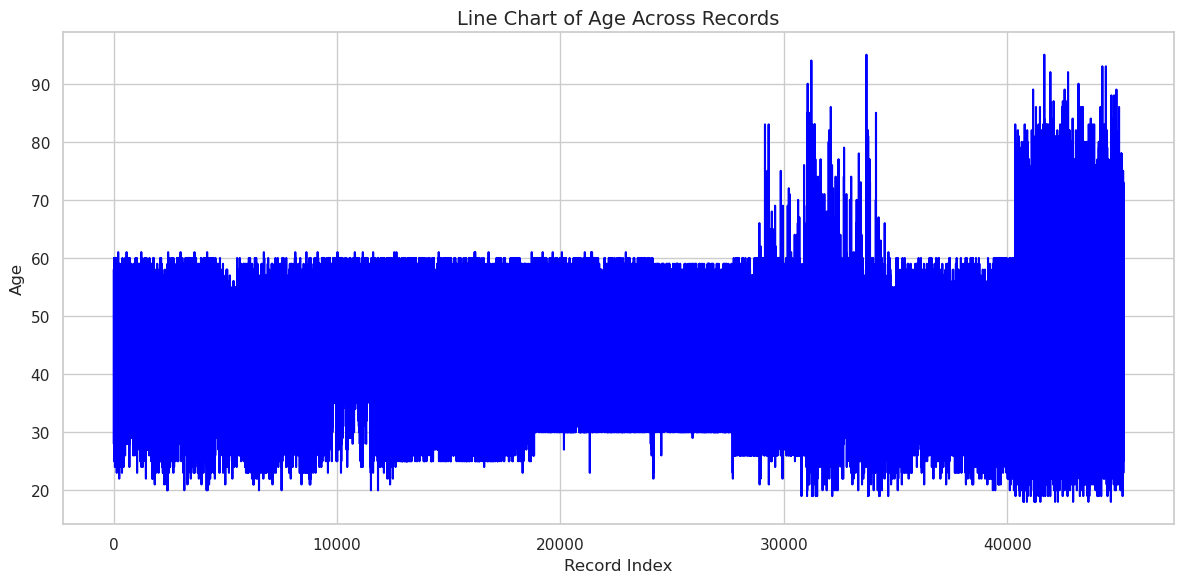

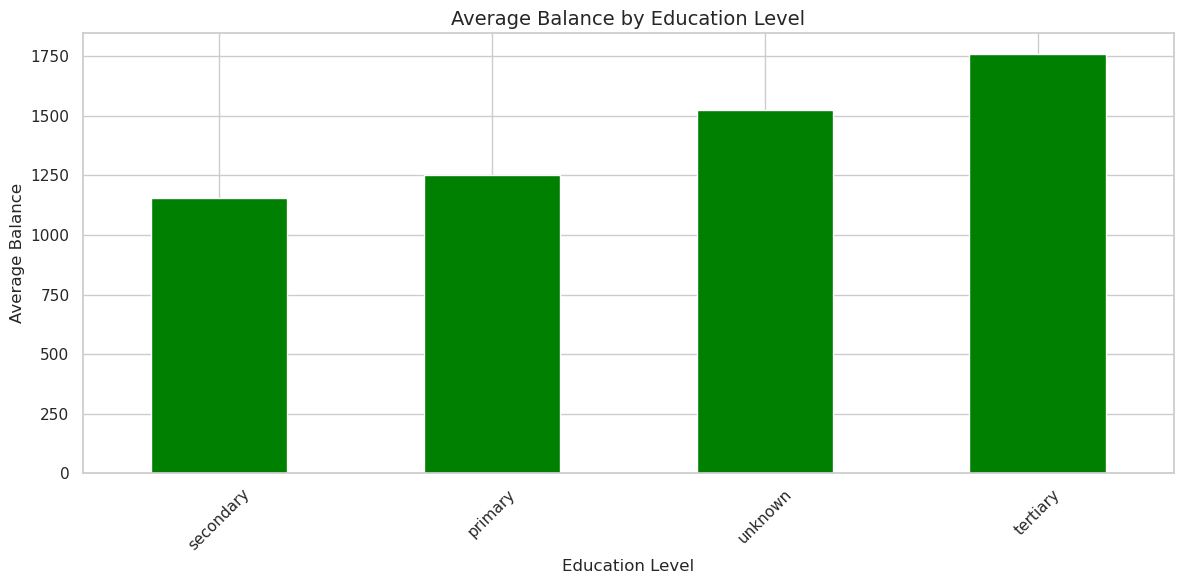

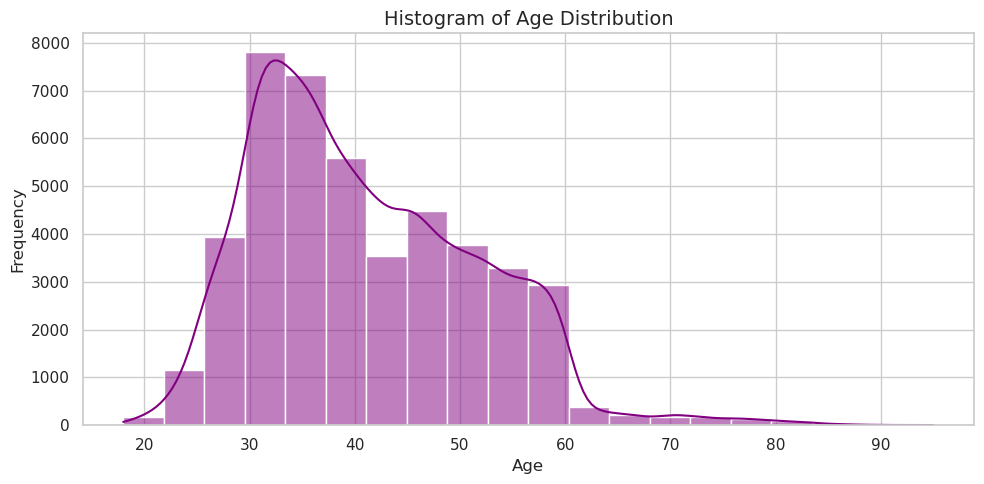

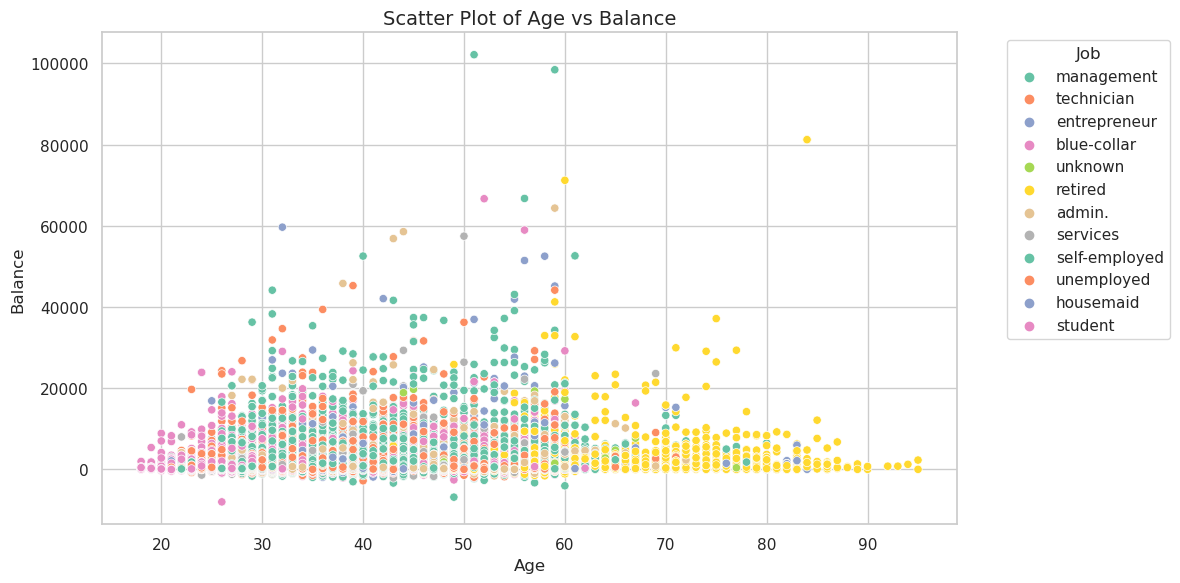

In [39]:
# Task 3: Data Visualization with Customization

# 1. Line Chart: Age over Index
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['age'].reset_index(drop=True), color='blue')
plt.title("Line Chart of Age Across Records", fontsize=14)
plt.xlabel("Record Index", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar Chart: Average Balance by Education Level
plt.figure(figsize=(12, 6))
edu_balance = df_cleaned.groupby("education")["balance"].mean().sort_values()
edu_balance.plot(kind='bar', color='green')
plt.title("Average Balance by Education Level", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Balance", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Histogram: Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['age'], bins=20, kde=True, color='purple')
plt.title("Histogram of Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Scatter Plot: Age vs Balance
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='age', y='balance', hue='job', palette='Set2')
plt.title("Scatter Plot of Age vs Balance", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.legend(title='Job', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
